# Apriori Algorithm and Key Terms

The **Apriori algorithm** is a classical algorithm used in data mining for **association rule learning**. It helps to identify **frequent itemsets** (sets of items that appear together frequently) and generate **association rules** (relationships between items). It's widely used in market basket analysis.

### Key Terms in the Apriori Algorithm:

1. **Itemset**:
   - A collection of one or more items. For example, {milk, bread} is an itemset.

2. **Frequent Itemset**:
   - An itemset that appears in the dataset (transactions) with a frequency higher than a predefined threshold called **support**.

3. **Support**:
   - The proportion of transactions in the dataset that contain a particular itemset.
   - Formula:  
     Support(A) = (Transactions containing A) / (Total transactions)

4. **Confidence**:
   - The probability that item B is purchased when item A is purchased. It is used to evaluate the strength of the rule.
   - Formula:  
     Confidence(A → B) = Support(A ∪ B) / Support(A)

5. **Lift**:
   - A measure of how much more likely item B is purchased when item A is purchased, compared to when they are independent.
   - Formula:  
     Lift(A → B) = Confidence(A → B) / Support(B)

6. **Association Rule**:
   - A rule of the form A → B, meaning "if item A is purchased, then item B is likely to be purchased."

### Steps in the Apriori Algorithm:

1. **Generate Candidate Itemsets**:
   - Start with individual items and generate pairs of items, triplets, etc., until the itemsets that don’t meet the support threshold are removed.

2. **Prune**:
   - Eliminate itemsets that don't meet the minimum support threshold.

3. **Generate Rules**:
   - For each frequent itemset, generate association rules and calculate confidence and lift to evaluate them.

The Apriori algorithm is efficient for smaller datasets, but it may not perform well with large datasets due to the large number of itemsets it generates.


## Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Install apyori
from apyori import apriori

## Importing Dataset

In [3]:
df = pd.read_csv('Datasets/Groceries_dataset.csv')

## Exploratory Data Analysis

In [4]:
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [5]:
df.shape

(38765, 3)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [7]:
df.describe()

,Member_number
count,38765.000000
mean,3003.641868
std,1153.611031
min,1000.000000
25%,2002.000000
50%,3005.000000
75%,4007.000000
max,5000.000000


In [8]:
# It gives the total number of elements in the dataset
df.size

116295

In [9]:
# It gives the dimensions of the dataset
df.ndim

2

In [10]:
# Check the null values
df.isnull().sum()

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [11]:
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


#### 1) Which of the items are top selling items?

In [12]:
df.itemDescription.value_counts().head(10)

itemDescription
whole milk          2502
other vegetables    1898
rolls/buns          1716
soda                1514
yogurt              1334
root vegetables     1071
tropical fruit      1032
bottled water        933
sausage              924
citrus fruit         812
Name: count, dtype: int64

Text(0.5, 1.0, 'Top 10 Selling Items')

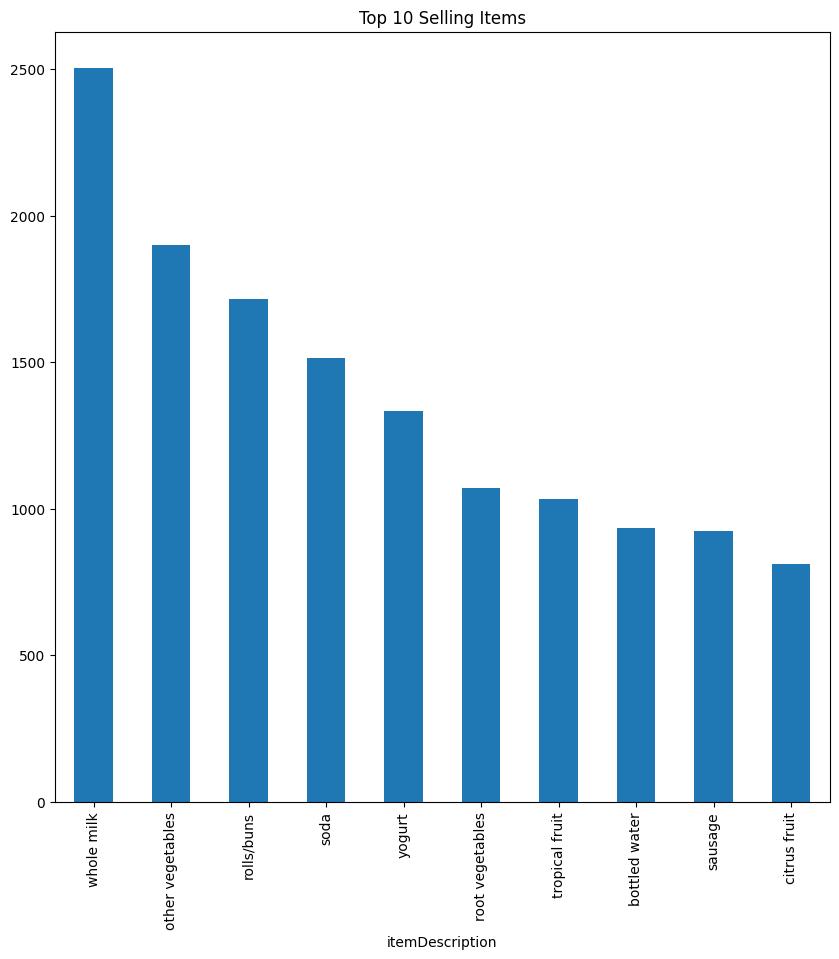

In [13]:
# In a bar plot
plt.figure(figsize=(10,10))
df.itemDescription.value_counts().head(10).plot.bar()
plt.title('Top 10 Selling Items')

#### 2) Which items are the least selling items?

In [14]:
value_counts = df['itemDescription'].value_counts()
least_frequent_value = value_counts[value_counts == value_counts.min()].index
df[df['itemDescription'].isin(least_frequent_value)]

,Member_number,Date,itemDescription
8703,1748,14-08-2014,kitchen utensil
33699,1529,01-03-2014,preservation products


#### 3) What are the 10 items that are sold least?

In [15]:
df.itemDescription.value_counts().tail(10).sort_values()

itemDescription
kitchen utensil          1
preservation products    1
baby cosmetics           3
bags                     4
make up remover          5
toilet cleaner           5
frozen chicken           5
rubbing alcohol          5
salad dressing           6
whisky                   8
Name: count, dtype: int64

Text(0.5, 1.0, '10 Items that are Sold Least')

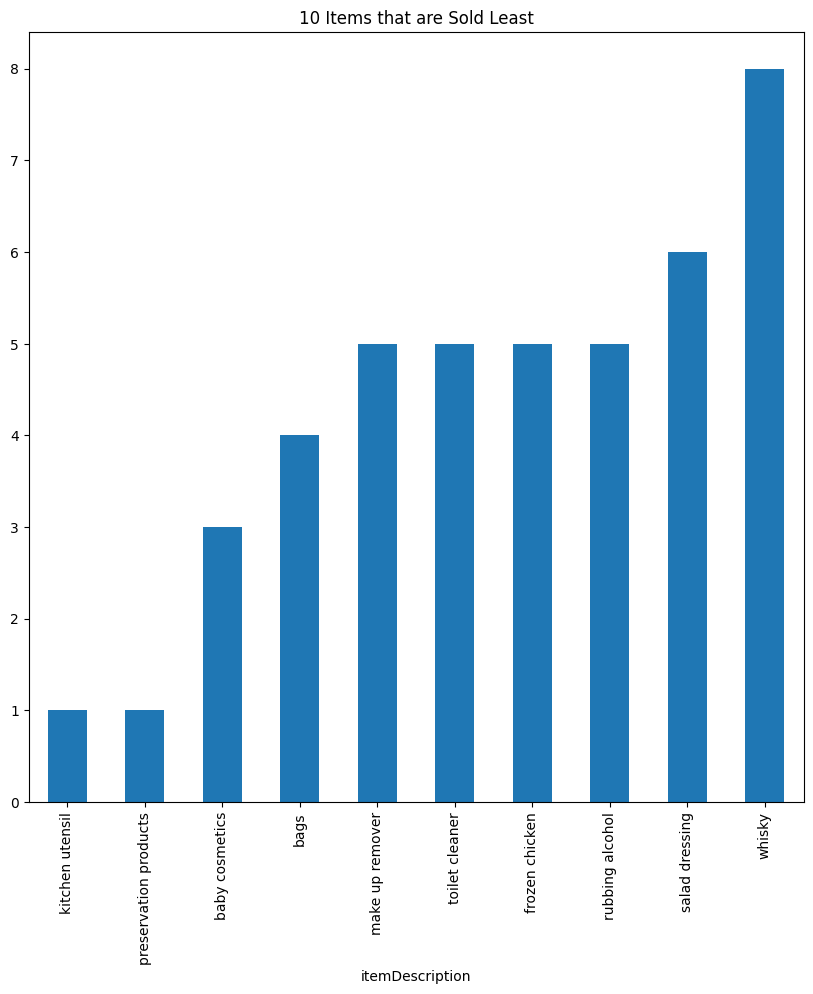

In [16]:
# In a graph
plt.figure(figsize=(10,10))
df.itemDescription.value_counts().tail(10).sort_values().plot.bar()
plt.title('10 Items that are Sold Least')

#### 4) Top 10 customers?

In [17]:
df.Member_number.value_counts().head(10)

Member_number
3180    36
3737    33
3050    33
2051    33
2625    31
3915    31
2433    31
2271    31
3872    30
3289    29
Name: count, dtype: int64

<Axes: xlabel='Member_number'>

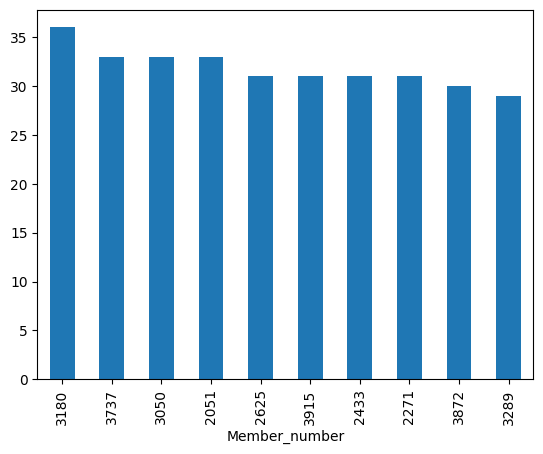

In [18]:
# In a graph
df.Member_number.value_counts().head(10).plot.bar()

In [19]:
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


#### Question 5:
#### In which year, the majority of the transactions happened?
#### In which month, the majority of the transactions happened?
#### In which day, the majority of the transactions happened?

In [20]:
df['Year'] = pd.DatetimeIndex(df['Date']).year
df['Month'] = pd.DatetimeIndex(df['Date']).month
df['Day'] = pd.DatetimeIndex(df['Date']).day

In [21]:
df.head(2)

,Member_number,Date,itemDescription,Year,Month,Day
0,1808,21-07-2015,tropical fruit,2015,7,21
1,2552,05-01-2015,whole milk,2015,5,1


In [22]:
# 5) In which year, the majority of the transactions happened?
df.Year.value_counts()

Year
2015    20488
2014    18277
Name: count, dtype: int64

In [23]:
# 5) In which month, the majority of the transactions happened?
df.Month.value_counts().head(3)

Month
8    3498
5    3335
1    3333
Name: count, dtype: int64

In [24]:
# 5) In which day, the majority of the transactions happened?
df.Day.value_counts().head(3)

Day
28    1375
21    1354
26    1351
Name: count, dtype: int64

#### 6) In which month of 2015, majority of Transactions have happened?

In [25]:
df[df.Year == 2015].Month.value_counts().head(3)

Month
8    1963
1    1829
3    1792
Name: count, dtype: int64

#### 7) In which day of August 2015, majority of Transactions have happened?

In [26]:
# df[[df.Year == 2015 and df.Month == 8]].Day.value_counts().head(3) -> ERROR
df[(df['Year'] == 2015) & (df['Month'] == 8)]['Day'].value_counts().head(3)

Day
8     92
20    83
21    83
Name: count, dtype: int64

# Apriori Implementation

In [27]:
df.head()

,Member_number,Date,itemDescription,Year,Month,Day
0,1808,21-07-2015,tropical fruit,2015,7,21
1,2552,05-01-2015,whole milk,2015,5,1
2,2300,19-09-2015,pip fruit,2015,9,19
3,1187,12-12-2015,other vegetables,2015,12,12
4,3037,01-02-2015,whole milk,2015,1,2


In [28]:
data = df.copy()
data1 = data.copy()

In [29]:
data = pd.get_dummies(data['itemDescription'])

In [30]:
data.head()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [31]:
data1.drop(['itemDescription'], axis = 1, inplace = True)

In [32]:
data1 = data1.join(data)

In [33]:
data1.head()

,Member_number,Date,Year,Month,Day,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,1808,21-07-2015,2015,7,21,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2552,05-01-2015,2015,5,1,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,2300,19-09-2015,2015,9,19,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1187,12-12-2015,2015,12,12,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,3037,01-02-2015,2015,1,2,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [34]:
products = df['itemDescription'].unique()

In [35]:
products

array(['tropical fruit', 'whole milk', 'pip fruit', 'other vegetables',
       'rolls/buns', 'pot plants', 'citrus fruit', 'beef', 'frankfurter',
       'chicken', 'butter', 'fruit/vegetable juice',
       'packaged fruit/vegetables', 'chocolate', 'specialty bar',
       'butter milk', 'bottled water', 'yogurt', 'sausage', 'brown bread',
       'hamburger meat', 'root vegetables', 'pork', 'pastry',
       'canned beer', 'berries', 'coffee', 'misc. beverages', 'ham',
       'turkey', 'curd cheese', 'red/blush wine',
       'frozen potato products', 'flour', 'sugar', 'frozen meals',
       'herbs', 'soda', 'detergent', 'grapes', 'processed cheese', 'fish',
       'sparkling wine', 'newspapers', 'curd', 'pasta', 'popcorn',
       'finished products', 'beverages', 'bottled beer', 'dessert',
       'dog food', 'specialty chocolate', 'condensed milk', 'cleaner',
       'white wine', 'meat', 'ice cream', 'hard cheese', 'cream cheese ',
       'liquor', 'pickled vegetables', 'liquor (appetizer

In [36]:
len(products)

167

In [37]:
data2 = data1.groupby(['Member_number', 'Date'])[products[:]].sum()

In [38]:
data2.head()

tropical fruit  whole milk  pip fruit  \
Member_number Date                                                
1000          15-03-2015               0           1          0   
              24-06-2014               0           1          0   
              24-07-2015               0           0          0   
              25-11-2015               0           0          0   
              27-05-2015               0           0          0   

                          other vegetables  rolls/buns  pot plants  \
Member_number Date                                                   
1000          15-03-2015                 0           0           0   
              24-06-2014                 0           0           0   
              24-07-2015                 0           0           0   
              25-11-2015                 0           0           0   
              27-05-2015                 0           0           0   

                          citrus fruit  beef  frankfurter  chicken  ...  \
Member_number Date                                                  ...   
1000          15-03-2015             0     0            0        0  ...   
              24-06-2014             0     0            0        0  ...   
              24-07-2015             0     0            0        0  ...   
              25-11-2015             0     0            0        0  ...   
              27-05-2015             0     0            0        0  ...   

                          flower (seeds)  rice  tea  salad dressing  \
Member_number Date                                                    
1000          15-03-2015               0     0    0               0   
              24-06-2014               0     0    0               0   
              24-07-2015               0     0    0               0   
              25-11-2015               0     0    0               0   
              27-05-2015               0     0    0               0   

                          specialty vegetables  pudding powder  ready soups  \
Member_number Date                                                            
1000          15-03-2015                     0               0            0   
              24-06-2014                     0               0            0   
              24-07-2015                     0               0            0   
              25-11-2015                     0               0            0   
              27-05-2015                     0               0            0   

                          make up remover  toilet cleaner  \
Member_number Date                                          
1000          15-03-2015                0               0   
              24-06-2014                0               0   
              24-07-2015                0               0   
              25-11-2015                0               0   
              27-05-2015                0               0   

                          preservation products  
Member_number Date                               
1000          15-03-2015                      0  
              24-06-2014                      0  
              24-07-2015                      0  
              25-11-2015                      0  
              27-05-2015                      0  

[5 rows x 167 columns]

In [39]:
data2 = data2.reset_index()[products]

In [40]:
data2

,tropical fruit,whole milk,pip fruit,other vegetables,rolls/buns,pot plants,citrus fruit,beef,frankfurter,chicken,...,flower (seeds),rice,tea,salad dressing,specialty vegetables,pudding powder,ready soups,make up remover,toilet cleaner,preservation products
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14958,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14959,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14960,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14961,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
data2.values[1]

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

#### Make it in such a way that it should show the column names where the values are 1.

In [42]:
# Ensure all columns in `data2` are of dtype object
data2 = data2.astype(object)

In [43]:
def func(data):
    for i in products:
        if int(data[i]) > 0:
            data[i] = i 
    return data

In [44]:
data2 = data2.apply(func, axis=1)

In [45]:
data2

,tropical fruit,whole milk,pip fruit,other vegetables,rolls/buns,pot plants,citrus fruit,beef,frankfurter,chicken,...,flower (seeds),rice,tea,salad dressing,specialty vegetables,pudding powder,ready soups,make up remover,toilet cleaner,preservation products
0,0,whole milk,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,whole milk,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14958,tropical fruit,0,0,other vegetables,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14959,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14960,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14961,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
newdata = data2.values

In [47]:
newdata

array([[0, 'whole milk', 0, ..., 0, 0, 0],
       [0, 'whole milk', 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=object)

In [48]:
for i in newdata:
    if i[i!=0].tolist():
        print(i[i!=0].tolist())

['whole milk', 'yogurt', 'sausage', 'semi-finished bread']
['whole milk', 'pastry', 'salty snack']
['canned beer', 'misc. beverages']
['sausage', 'hygiene articles']
['soda', 'pickled vegetables']
['frankfurter', 'curd']
['whole milk', 'rolls/buns', 'sausage']
['whole milk', 'soda']
['beef', 'white bread']
['frankfurter', 'soda', 'whipped/sour cream']
['other vegetables', 'frozen vegetables']
['whole milk', 'butter']
['tropical fruit', 'sugar']
['butter milk', 'specialty chocolate']
['rolls/buns', 'sausage']
['root vegetables', 'detergent']
['frozen meals', 'dental care']
['rolls/buns']
['dish cleaner', 'cling film/bags']
['canned beer', 'frozen fish']
['other vegetables', 'hygiene articles']
['tropical fruit', 'whole milk', 'pip fruit']
['rolls/buns', 'chocolate', 'red/blush wine']
['other vegetables', 'shopping bags']
['whole milk', 'rolls/buns', 'packaged fruit/vegetables', 'chocolate']
['whole milk', 'root vegetables', 'pastry']
['rolls/buns']
['margarine', 'whipped/sour cream']
['

In [49]:
newdata = [i[i!=0].tolist() for i in newdata if i[i!=0].tolist()]

In [50]:
newdata[:10]

[['whole milk', 'yogurt', 'sausage', 'semi-finished bread'],
 ['whole milk', 'pastry', 'salty snack'],
 ['canned beer', 'misc. beverages'],
 ['sausage', 'hygiene articles'],
 ['soda', 'pickled vegetables'],
 ['frankfurter', 'curd'],
 ['whole milk', 'rolls/buns', 'sausage'],
 ['whole milk', 'soda'],
 ['beef', 'white bread'],
 ['frankfurter', 'soda', 'whipped/sour cream']]

In [51]:
# Now we have converted it into the better data as per each customer... from item for each transaction
df.head(2)

,Member_number,Date,itemDescription,Year,Month,Day
0,1808,21-07-2015,tropical fruit,2015,7,21
1,2552,05-01-2015,whole milk,2015,5,1


# Apriori Implementation

In [52]:
association = apriori(newdata,
                      min_support = 0.0003,
                      min_confidence = 0.05,
                      min_lift = 3,
                      max_length = 2)

In [53]:
result = list(association)

In [54]:
result[0]

RelationRecord(items=frozenset({'fruit/vegetable juice', 'liver loaf'}), support=0.00040098910646260775, ordered_statistics=[OrderedStatistic(items_base=frozenset({'liver loaf'}), items_add=frozenset({'fruit/vegetable juice'}), confidence=0.12, lift=3.5276227897838903)])

In [55]:
# The association rule for the above is like this
# liver loaf -> fruit/vegetable juice
# {3, 4} -> 5

#### 8) When we see the result[i], we only need to see the items

In [56]:
for i in result[5]:
    print(i)

frozenset({'seasonal products', 'soups'})
0.0003341575887188398
[OrderedStatistic(items_base=frozenset({'soups'}), items_add=frozenset({'seasonal products'}), confidence=0.10416666666666667, lift=14.704205974842768)]


In [57]:
# Hence, our first index has the items

In [58]:
list = []
for i in result[5][0]:
    list.append(i)
list

['seasonal products', 'soups']

In [59]:
result[5][0]

frozenset({'seasonal products', 'soups'})

In [60]:
type(result[5])

apyori.RelationRecord

Itemset: {'soups', 'seasonal products'}
Association Rule: soups -> seasonal products
Support = 0.0003341575887188398
Confidence = 0.10416666666666667
Lift=14.704205974842768